In [2]:
#programer:Pradnya Ekad
#collage:Keystone school of Engineering

In [1]:
#Dataset : Salary_Data.csv
#https://mitu.co.in/datase

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Salary_Data.csv')
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [4]:
df.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [5]:
import warnings
warnings.filterwarnings('ignore')

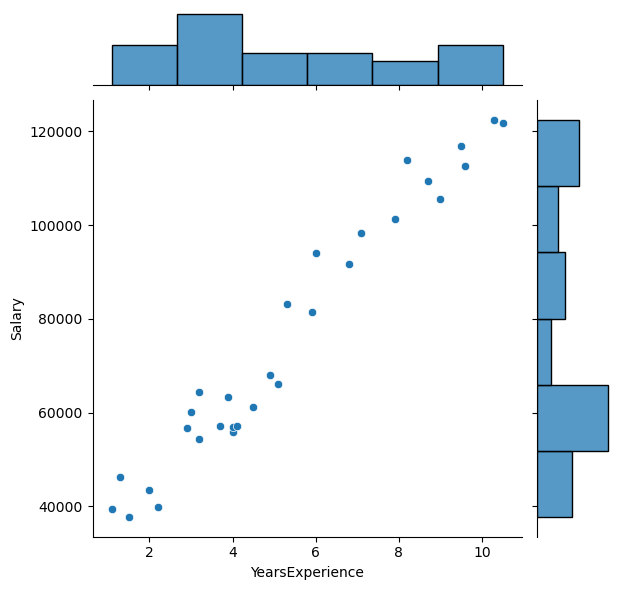

In [6]:
sns.jointplot(x = 'YearsExperience', y= 'Salary', data=df);

# Separate input and output

In [7]:
x = df['YearsExperience']
y = df['Salary']

In [8]:
x.ndim

1

In [9]:
x = x.values.reshape(30,1) #30->rows.., 1 for adding one dimension for column

In [10]:
x.ndim

2

# Cross Validation

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state= 0,test_size= 0.25)

In [13]:
x_train.shape

(22, 1)

In [14]:
y_train.shape

(22,)

# Build Linear Regression Model

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
# create an object

lr = LinearRegression()

In [17]:
lr.fit(x_train,y_train)

LinearRegression()

# Evaluation

In [18]:
y_pred = lr.predict(x_test)

In [19]:
y_pred

array([ 41056.25705466, 123597.70938378,  65443.50433372,  63567.56223533,
       116093.94099022, 108590.17259667, 117031.91203942,  64505.53328452])

In [20]:
compare = pd.DataFrame({
    'Actual': y_test,
    'Predicted':y_pred
})

In [21]:
compare

,Actual,Predicted
2,37731.0,41056.257055
28,122391.0,123597.709384
13,57081.0,65443.504334
10,63218.0,63567.562235
26,116969.0,116093.940990
24,109431.0,108590.172597
27,112635.0,117031.912039
11,55794.0,64505.533285


In [22]:
# Mean absolute error

sum(abs(y_test - y_pred)/ len(y_pred))

3508.5455930660555

In [23]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test,y_pred)

3508.5455930660555

In [24]:
# sum square error

sum(((y_test - y_pred)**2/ len(y_pred)))

22407940.143340684

In [25]:
# actual accuracy/r2_score...r2_score value belong to 0 to 1

from sklearn.metrics import r2_score

r2_score(y_test,y_pred)

0.9779208335417602

# Best-fit Line

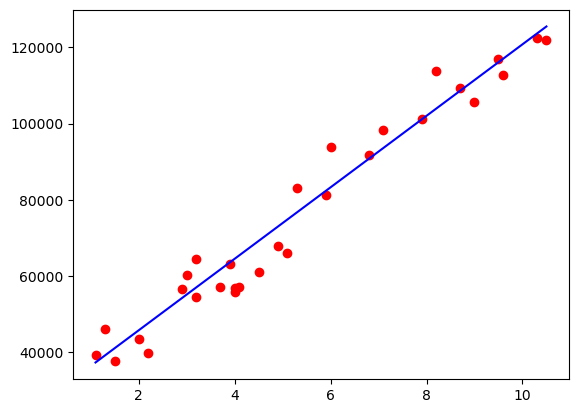

In [26]:
plt.scatter(x,y,color='r')
plt.plot(x,lr.predict(x),color='b');

# Decision Tree1

In [27]:
#Dataset : movies.csv
#Location : https://mitu.co.in/dataset

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
df = pd.read_csv('movies.csv')
df

,Movie,Budget,Celebrities,Class
0,The 400 Blows,100000000,2.0,Box Office Burst
1,La Haine,210000000,3.0,Box Office Burst
2,The Godfather,250000000,4.0,Box Office Burst
3,The Godfather: Part II,350000000,2.0,Box Office Burst
4,Man Bites Dog,400600000,4.0,Box Office Burst
5,The Departed,500000000,2.0,Box Office Burst
6,Umberto D.,550000000,5.0,Box Office Burst
7,White Heat,610450000,4.0,Box Office Burst
8,Eddie Murphy: Raw,650000000,3.0,Box Office Burst
9,All Quiet on the Western Front,1000000000,5.0,Box Office Burst


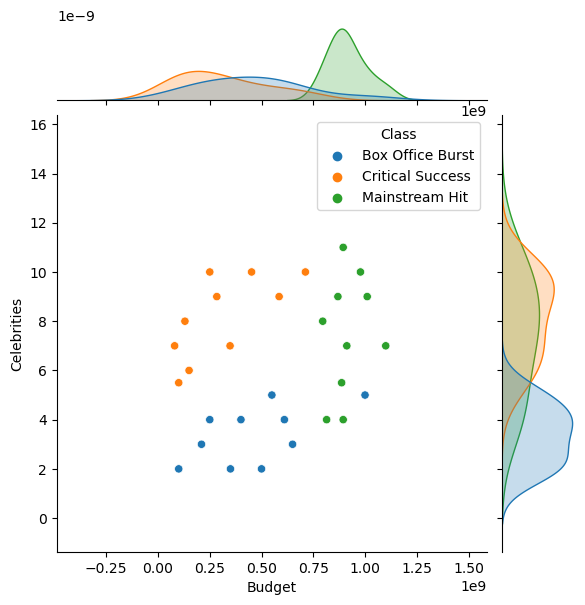

In [30]:
sns.jointplot(x = 'Budget',y = 'Celebrities', data=df, hue='Class');

In [31]:
#separate input and output data

x = df[['Budget','Celebrities']]
y = df['Class']

x

# Build the model

In [32]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
dt = DecisionTreeClassifier(random_state=0)

In [34]:
dt.fit(x,y)

DecisionTreeClassifier(random_state=0)

# Predict on new values

In [35]:
new1 = [[5000000,3]]

In [36]:
dt.predict(new1)

array(['Box Office Burst'], dtype=object)

In [37]:
new2 = [[5000000,8]]

In [38]:
dt.predict(new2)

array(['Critical Success'], dtype=object)

In [39]:
# Dataset : banknotes.csv
#Location : https://mitu.co.in/dataset

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
df = pd.read_csv('banknotes.csv')
df

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [42]:
df.shape

(1372, 5)

In [43]:
df.isnull().sum()

Variance    0
Skewness    0
Curtosis    0
Entropy     0
Class       0
dtype: int64

In [44]:
#separate input and output

x = df.drop('Class',axis=1)

y = df['Class']

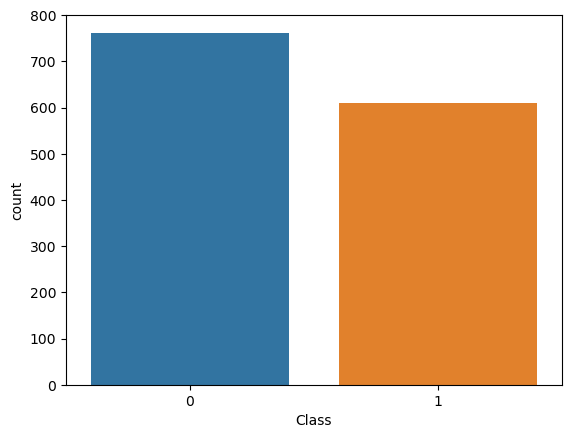

In [45]:
sns.countplot(x=y);

In [46]:
y.value_counts()

0    762
1    610
Name: Class, dtype: int64

# Cross Validation

In [47]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state= 0,test_size= 0.25)

In [48]:
x_train.shape

(1029, 4)

In [49]:
y_train.shape

(1029,)

# Build the Model

In [50]:
from sklearn.tree import DecisionTreeClassifier

In [51]:
dt = DecisionTreeClassifier(random_state=0)

In [52]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

# Evaluation 

In [53]:
y_pred = dt.predict(x_test)

In [54]:
# confusion matrix

from sklearn.metrics import ConfusionMatrixDisplay

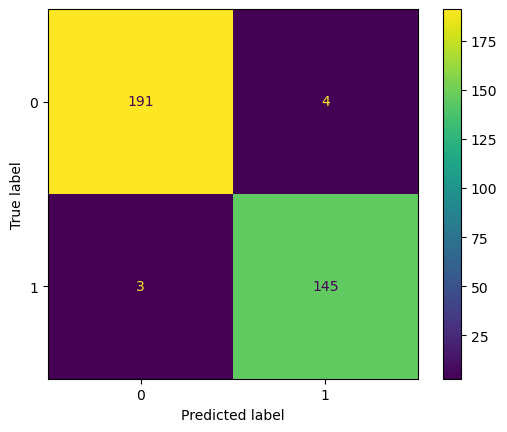

In [55]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred);

In [56]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       195
           1       0.97      0.98      0.98       148

    accuracy                           0.98       343
   macro avg       0.98      0.98      0.98       343
weighted avg       0.98      0.98      0.98       343



In [57]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

0.9795918367346939

# Plot the tree 

In [58]:
from sklearn.tree import plot_tree

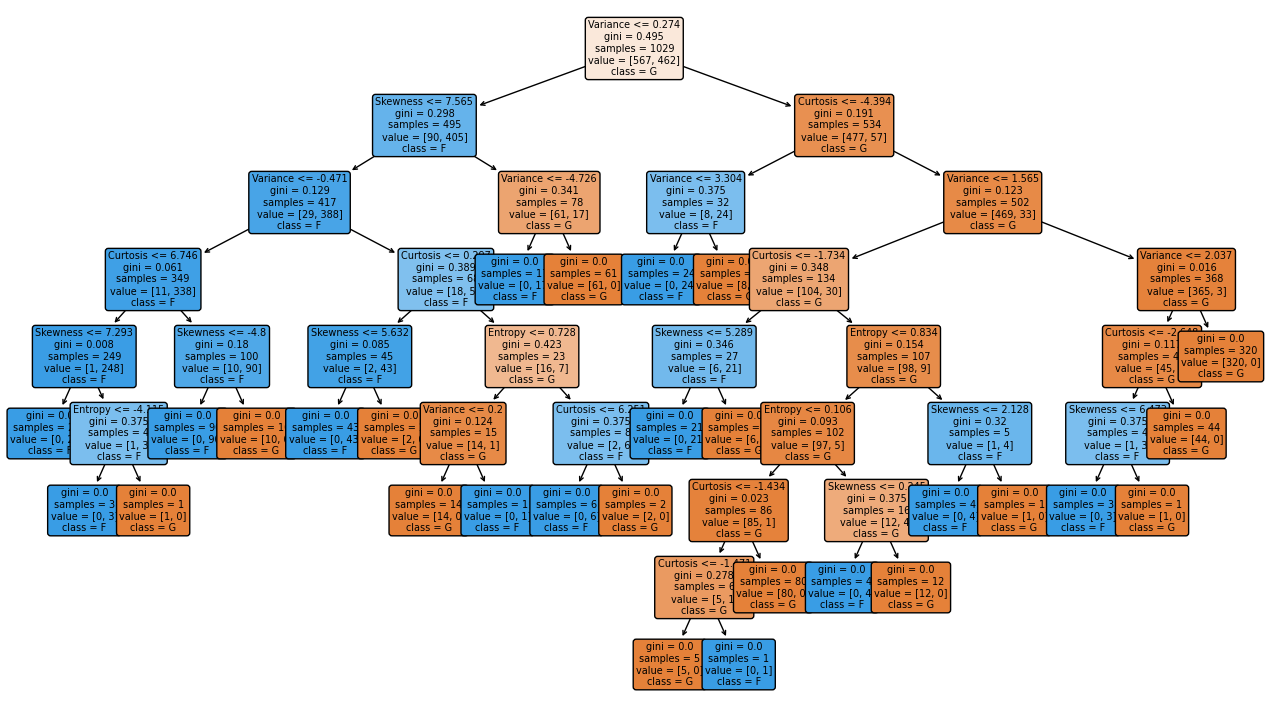

In [59]:
plt.figure(figsize=(16,9))

plot_tree(dt, fontsize=7, filled=True, rounded=True, class_names=['G','F'], feature_names= list(x.columns));

In [64]:
imp = dt.feature_importances_

In [65]:
imp

array([0.62095248, 0.21106862, 0.14189251, 0.02608639])

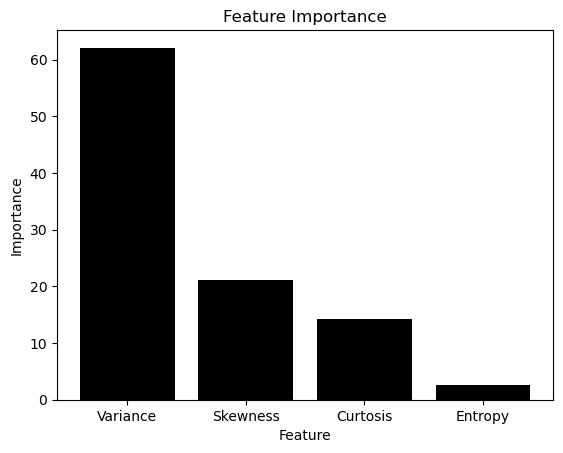

In [66]:
plt.title('Feature Importance')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.bar(x.columns, imp * 100, color = 'black');

In [67]:
#Dataset : Mall_Customers.csv
#Location : https://mitu.co.in/dataset

In [68]:
df = pd.read_csv('Mall_Customers.csv')
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [69]:
x = df.iloc[:,[3,4]]

In [70]:
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [71]:
from sklearn.cluster import KMeans

In [72]:
km = KMeans(n_clusters=3, random_state=0)

In [73]:
labels = km.fit_predict(x)

In [74]:
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [76]:
km.inertia_

106348.37306211119

# Find ideal no.of clusters

In [79]:
sse = []

for k in range(1,16):
    km = KMeans(n_clusters=k)
    km.fit_predict(x)
    sse.append(km.inertia_)

In [80]:
sse

[269981.28,
 183499.07470288622,
 106348.37306211119,
 73679.78903948834,
 44448.45544793371,
 37271.88623658949,
 30241.343617936585,
 25037.601066566283,
 22903.321536115873,
 19634.55462934998,
 17879.73974146009,
 16056.615737203974,
 14399.81008625326,
 13507.33484068114,
 12292.787697571192]

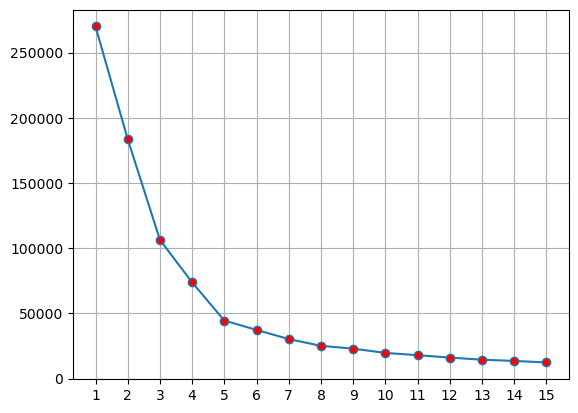

In [81]:
plt.xticks(range(1,16))
plt.plot(range(1,16), sse, marker = 'o', mfc= 'r');
plt.grid()

In [ ]:
#https://mitu.co.in/review